# LA Type A Cell Example

### Install dependencies for ACT and setup environment

In [1]:
!pip install act-neuron

import os
import sys

from act import simulator, analysis
from IPython.display import Image
import numpy as np

# Download the repository with all relevant model files if in google colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !rm -rf ./ACT
    !git clone https://github.com/V-Marco/ACT
    base_dir = "./ACT"
else:
    base_dir = "../.."

### The non-segregated approach

Define a config file for ACT to run a simulation.

In [5]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/LA/A/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/LA/A/orig_modfiles"),
        "name": "Cell_A",
    },
    "simulation_parameters": {
        "h_v_init": -70.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "glbar_leak", "low": 2.75e-5, "high": 1e-4}, # leak, passive
            {"channel": "ghdbar_hd", "low": 1.15e-05, "high": 4.6e-05}, # hd, passive
            {"channel": "gbar_nap", "low": 0.000071, "high": 0.000284}, # nap, lto and hto
            {"channel": "gmbar_im", "low": 0.001, "high": 0.004}, # im, lto and hto
            {"channel": "gbar_na3", "low": 0.015, "high": 0.06}, # na3, spiking/adaptation
            {"channel": "gkdrbar_kdr", "low": 0.00075, "high": 0.003}, # kdr, spiking/adaptation
            {"channel": "gcabar_cadyn", "low": 3e-5, "high": 1.2e-4}, # cadyn, spiking/adaptation
            {"channel": "gsAHPbar_sAHP", "low": 0.0045, "high": 0.018}, # sahp, spiking/adaptation
        ],
        "target_V": None,  # Target voltages
        "target_params": [5.5e-5, 2.3e-05, 0.000142, 0.002, 0.03, 0.0015, 6e-5, 0.009],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        { # passive
            "params": ["glbar_leak", "ghdbar_hd"],
            "voltage": [-80, -67.5],
        },
        { # lto
            "params": ["gbar_nap", "gmbar_im"],
            "voltage": [-67.5, -57.5],
        },
        { # spking / adaptation
            "params": ["gbar_na3", "gkdrbar_kdr", "gcabar_cadyn", "gsAHPbar_sAHP"],
            "voltage": [-57.5, 0],
        },
        { # hto
            "params": ["gbar_nap", "gmbar_im"],
            "voltage": [-40, -30],
        },
    ],
    "output": {"folder": "output_LA_A", "produce_plots": True},
    "run_mode": "original",  # "original", "segregated"
}

In [6]:
# Run the simulation

simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/LA
Mod files: "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/cadyn.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/cal2.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/ca.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/capool.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/cat.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/currentclamp.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/function_TMonitor.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/h.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/ICat2.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/Ikleaksd.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/im.mod" "../../data/LA/A/orig_modfiles/../../data/LA/A/orig_modfiles/kadist.mod" "../../data/LA/A/ori

NEURON: The user defined name already exists: cadyn
 near line 0
 ^
        nrn_load_dll("./x86_64/....")



(2023-09-09 12:05:04.933514)-[START]
(2023-09-09 12:05:04.933635)-[INFO]: Number of amplitudes: 120
(2023-09-09 12:05:04.941207)-[INFO]: Mod files already loaded. Continuing.
(2023-09-09 12:06:16.743045)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-09 12:06:16.799075)-[INFO]: Matching 12 amplitudes.
(2023-09-09 12:07:19.456886)-[INFO]: Total amplitudes matched: 10/12.


KeyboardInterrupt: 

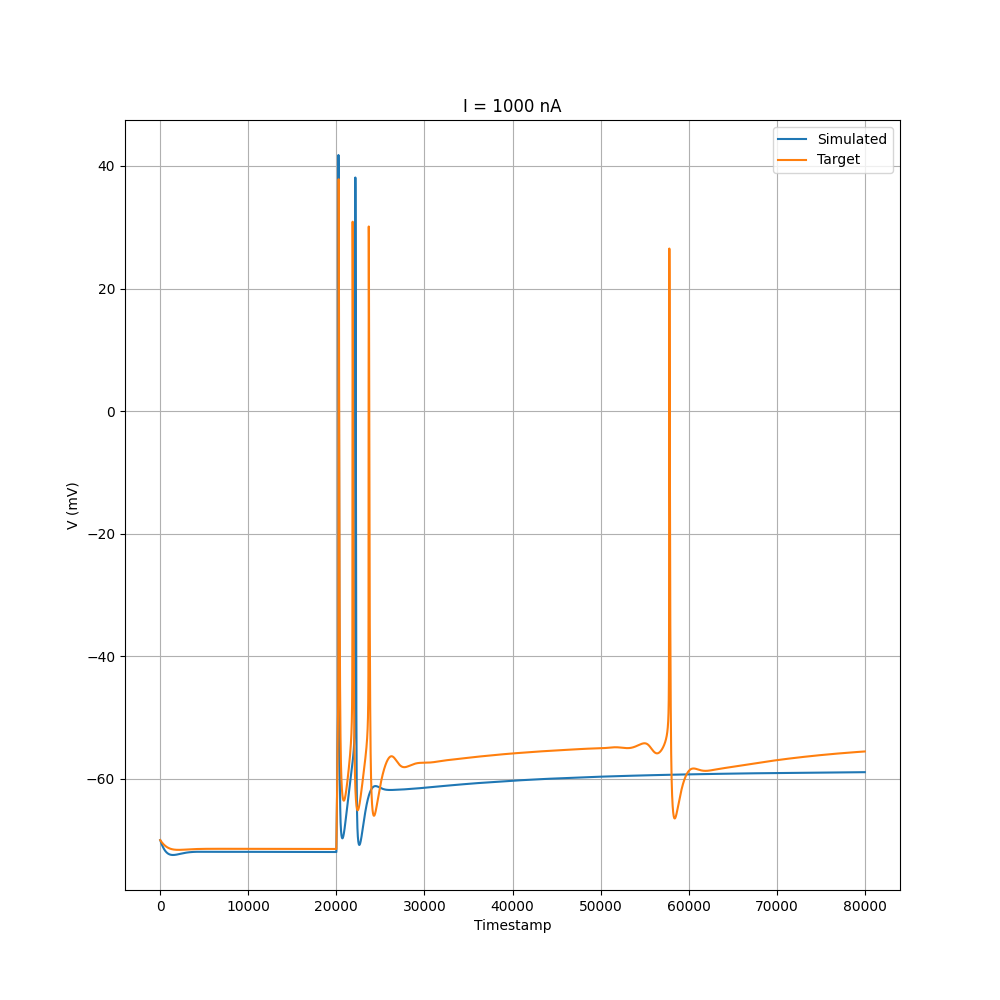

In [ ]:
Image(filename="./output_LA_A/original/1000nA.png")

In [ ]:
analysis.print_run_stats(config)

output_LA_A : original
Med MSE: 51.6922 (71.3803)
Med Corr: 0.8752 (0.1093)

Predicted values:
   glbar_leak  ghdbar_hd  gbar_nap  gmbar_im  gbar_na3  gkdrbar_kdr  \
0     0.00004   0.000044  0.000243     0.004      0.06        0.003   

   gcabar_cadyn  gsAHPbar_sAHP  
0       0.00012       0.008336  
Target values:
   glbar_leak  ghdbar_hd  gbar_nap  gmbar_im  gbar_na3  gkdrbar_kdr  \
0    0.000055   0.000023  0.000142     0.002      0.03       0.0015   

   gcabar_cadyn  gsAHPbar_sAHP  
0       0.00006          0.009  
Error:
   glbar_leak  ghdbar_hd  gbar_nap  gmbar_im  gbar_na3  gkdrbar_kdr  \
0   -0.000015   0.000021  0.000101     0.002      0.03       0.0015   

   gcabar_cadyn  gsAHPbar_sAHP  
0       0.00006      -0.000664  

Pred MAE: 0.0043

Passive properties:
{
  "leak_conductance_variable": null,
  "leak_reversal_variable": null,
  "r_in": 71.47682189941406,
  "tau": 14.0,
  "v_rest": -71.93914031982422
}
----------



### Segregation with analytical setting of passive properties

In this section, let's set the passive properties for the cell so they can be analytically determined instead of using a model network.

In [3]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/LA/A/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/LA/A/seg_modfiles"),
        "name": "Cell_A",
        "passive_properties": {
            "v_rest": -70,
            "r_in": 141,
            "tau": 30.88,
            "leak_conductance_variable": "glbar_leak",  # eg: g_leak
            "leak_reversal_variable": "el_leak",  # eg: e_leak
        },
    },
    "simulation_parameters": {
        "h_v_init": -70.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "ghdbar_hd", "low": 1.15e-05, "high": 4.6e-05}, # hd, passive
            {"channel": "gbar_nap", "low": 0.000071, "high": 0.000284}, # nap, lto and hto
            {"channel": "gmbar_im", "low": 0.001, "high": 0.004}, # im, lto and hto
            {"channel": "gbar_na3", "low": 0.015, "high": 0.06}, # na3, spiking/adaptation
            {"channel": "gkdrbar_kdr", "low": 0.00075, "high": 0.003}, # kdr, spiking/adaptation
            {"channel": "gcabar_cadyn", "low": 3e-5, "high": 1.2e-4}, # cadyn, spiking/adaptation
            {"channel": "gsAHPbar_sAHP", "low": 0.0045, "high": 0.018}, # sahp, spiking/adaptation
        ],
        "target_V": None,  # Target voltages
        "target_params": [5.5e-5, 2.3e-05, 0.000142, 0.002, 0.03, 0.0015, 6e-5, 0.009],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        #{ # passive
        #    "params": ["ghdbar_hd"],
        #    "voltage": [-80, -67.5],
        #},
        { # lto
            "params": ["gbar_nap", "gmbar_im"],
            "voltage": [-67.5, -57.5],
        },
        { # spking / adaptation
            "params": ["gbar_na3", "gkdrbar_kdr", "gcabar_cadyn", "gsAHPbar_sAHP"],
            "voltage": [-57.5, 0],
        },
        { # hto
            "params": ["gbar_nap", "gmbar_im"],
            "voltage": [-40, -30],
        },
    ],
    "output": {"folder": "output_LA_A", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

In [4]:
simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/LA
Mod files: "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/cadyn.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/capool.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/currentclamp.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/h.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/im.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/kaprox.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/kdrca1DA.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/kdrca1.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/leakDA.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/leak.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/na3DA.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_modfiles/na3.mod" "../../data/LA/A/seg_modfiles/../../data/LA/A/seg_m

NEURON: The user defined name already exists: cadyn
 near line 0
 objref hoc_obj_[2]
                   ^
        nrn_load_dll("./x86_64/....")


 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special

(2023-09-09 12:03:19.969338)-[START]
(2023-09-09 12:03:19.969382)-[INFO]: Number of amplitudes: 120
(2023-09-09 12:03:19.994264)-[INFO]: Mod files already loaded. Continuing.
(2023-09-09 12:04:23.656721)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Setting el_leak = -70
Setting Cell_A[0].soma[0].glbar_leak = 0.00007824
Setting Cell_A[0].soma[0].cm = 2.41605906
(2023-09-09 12:04:23.708695)-[INFO]: Matching 12 amplitudes.


KeyboardInterrupt: 

In [ ]:
Image(filename="./output_LA_A/segregated/1000nA.png")

In [ ]:
analysis.print_run_stats(config)

In [ ]:
Image(filename="./output_LA_A/segregated/passive_-100nA.png")